In [ ]:
it is collection of stumps or forest of stumps

stumps >> D.T with just one root node and two leaf node (Decision node)
>> Weak learner 
>> we are converting weak learner into strong learner
    
#     default = 50

In [ ]:
NSW = NEW SAMPLE WEIGHT
Row No.  x1    x2    x3   Target  Sample weight  NSW       Normalize   Buckets

1        Y     Y     200    Y      1/8            0.0472    0.071     0.00 to 0.07
2        N     Y     180    Y      1/8            0.0472    0.071     0.07 to 0.14
3        Y     N     210    Y      1/8            0.0472    0.071     0.14 to 0.21
4        Y     Y     167    Y      1/8 (Missclas) 0.3307    0.50      0.21 to 0.71>>>>>>>>>>>>>mmeans x3
5        N     Y     155    N      1/8            0.0472    0.071     0.71 to 0.78
6        N     Y     135    N      1/8            0.0472    0.071     0.78 to 0.85
7        Y     N     168    N      1/8            0.0472    0.071     0.85 to 0.92
8        Y     Y     172    N      1/8            0.0472    0.071     0.92 to  1.0
 

      x1
Y = Yes,    N = No
3Y & 2N     1Y & 2N

# YES
P(Y) = 3/5   
P(N) = 2/5
G.I(Yes) = 1- (3/5)^2 - (2/5)^2 = 0.48

# NO
P(Y) = 1/3
P(N) = 2/3

G.I(No) = 1- (1/3)^2 - (2/3)^2 =0.44

G.I =  (5/8)*0.48 + (3/8)*0.44 = 0.46


#         x2
Y = Yes,    N = No
3Y & 3N     1Y & 1N
G.I(YES) = 0.5
G.I(NO) = 0.5

G.I(Overall) = 0.5

# x3

G.I(overall) = 0.19 Th = 176



In [ ]:
1)  Total Error (TE)= No.of Missclassified samples / Total No of samples
            = 1/8
2) Performance of the model 1= (1/2)* log([(1-TE)/TE]) = 0.972

3) new sample weight = S.W * e^-performance  >> For perfectly classified data
                     = S.W * e^+performance  >> For missclassified data

4) Normalize = weight/ (sum of all weights)
5) Create buckets

In [1]:
import pandas as pd
pd.Series(np.random.random(8))
0    0.511259
1    0.037585
2    0.029747
3    0.709272
4    0.905532
5    0.121857
6    0.398148
7    0.905920
dtype: float64

NameError: name 'np' is not defined

In [ ]:
#     Creating new data for model 2
     Random Weight   Row Number
    0.51              4
    0.037             1
    0.029             1
    0.71              4
    0.905532          7
    0.121857          2
    0.398148          4
    0.905920          7

In [ ]:
1        Y     Y     200    Y      1/8            0.0472    0.071     0.00 to 0.07
2        N     Y     180    Y      1/8            0.0472    0.071     0.07 to 0.14
3        Y     N     210    Y      1/8            0.0472    0.071     0.14 to 0.21
4        Y     Y     167    Y      1/8 (Missclas) 0.3307    0.50      0.21 to 0.71
5        N     Y     155    N      1/8            0.0472    0.071     0.71 to 0.78
6        N     Y     135    N      1/8            0.0472    0.071     0.78 to 0.85
7        Y     N     168    N      1/8            0.0472    0.071     0.85 to 0.92
8        Y     Y     172    N      1/8            0.0472    0.071     0.92 to  1.0

In [1]:
import pandas as pd 
import numpy as np
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from imblearn.over_sampling import SMOTE,RandomOverSampler

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier
from sklearn.metrics import silhouette_score,accuracy_score,confusion_matrix,recall_score,precision_recall_curve
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder,OneHotEncoder,OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier

#sampling
from imblearn.over_sampling import SMOTE,RandomOverSampler

In [2]:
df =pd.read_csv(r"D:/PYTHON_NOTES/CSV/heart.csv")

In [3]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
x = df.drop('target',axis=1)
y = df['target']


x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [5]:
adaboost = AdaBoostClassifier()
adaboost.fit(x,y)
y_pred =adaboost.predict(x_train)
accuracy_score_=accuracy_score(y_train,y_pred)
accuracy_score_

0.9090909090909091

In [6]:
y_pred =adaboost.predict(x_test)
accuracy_score_=accuracy_score(y_test,y_pred)
accuracy_score_

0.9508196721311475

In [7]:
adaboost.feature_importances_

array([0.18, 0.06, 0.04, 0.08, 0.16, 0.02, 0.02, 0.18, 0.02, 0.08, 0.04,
       0.08, 0.04])

<AxesSubplot:>

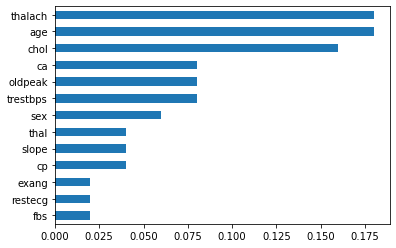

In [8]:
s=pd.Series(adaboost.feature_importances_,index=x.columns)
s.sort_values().plot(kind='barh')

# AFter # Hypertunning 

In [9]:
hyper = {'n_estimators':np.arange(10,50)
        ,'learning_rate':np.arange(0,2,0.01)}

#     n_estimators : int, default=50
#     The maximum number of estimators at which boosting is terminated.
#     In case of perfect fit, the learning procedure is stopped early.

In [10]:
random= RandomizedSearchCV(adaboost,hyper,cv=5)
random.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(),
                   param_distributions={'learning_rate': array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.5...
       1.54, 1.55, 1.56, 1.57, 1.58, 1.59, 1.6 , 1.61, 1.62, 1.63, 1.64,
       1.65, 1.66, 1.67, 1.68, 1.69, 1.7 , 1.71, 1.72, 1.73, 1.74, 1.75,
       1.76, 1.77, 1.78, 1.79, 1.8 , 1.81, 1.82, 1.83, 1.84, 1.85, 1.86,
       1.87, 1.88, 1.89, 1.9 , 1.91, 1.92, 1.93, 1.94, 1.95, 1.96, 1.97,
       1.98, 1.99]),
                                        'n_estimators': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49])})

In [11]:
random.best_estimator_

AdaBoostClassifier(learning_rate=0.35000000000000003, n_estimators=13)

In [12]:
adda =AdaBoostClassifier(learning_rate=0.52, n_estimators=25)
adda.fit(x_train,y_train)
y_pre =adda.predict(x_train)
accuracy_score_=accuracy_score(y_train,y_pre)
accuracy_score_

0.8677685950413223

In [13]:

y_pre =adda.predict(x_test)
accuracy_score_=accuracy_score(y_test,y_pre)
accuracy_score_

0.8360655737704918

<AxesSubplot:>

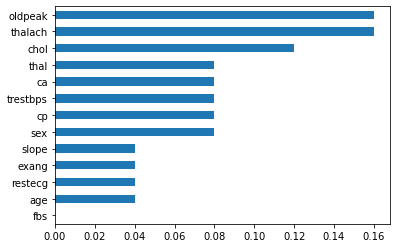

In [14]:
s=pd.Series(adda.feature_importances_,index=x.columns)
s.sort_values().plot(kind='barh')

In [15]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

# Train_test_split

In [16]:
x=df.drop("target",axis=1)
y=df['target']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=42,stratify=y)


# model training

# use Random_Forest

In [17]:
rf_clf= RandomForestClassifier()
rf_clf.fit(x_train,y_train)

RandomForestClassifier()

In [8]:
#Training 
y_pred_train = rf_clf.predict(x_train)

cnf_metrics = confusion_matrix(y_train,y_pred_train)
print("confusion metrics\n",cnf_metrics)

accuracy = accuracy_score(y_train,y_pred_train)
print("accuracy",accuracy)
clf_report = classification_report(y_train,y_pred_train)
print("clf_report\n",clf_report)

confusion metrics
 [[119   0]
 [  0 142]]
accuracy 1.0
clf_report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       119
           1       1.00      1.00      1.00       142

    accuracy                           1.00       261
   macro avg       1.00      1.00      1.00       261
weighted avg       1.00      1.00      1.00       261



In [9]:
#Testing
y_pred_test = rf_clf.predict(x_test)

cnf_metrics = confusion_matrix(y_test,y_pred_test)
print("confusion metrics\n",cnf_metrics)

accuracy = accuracy_score(y_test,y_pred_test)
print("accuracy",accuracy)
clf_report = classification_report(y_test,y_pred_test)
print("clf_report\n",clf_report)

confusion metrics
 [[17  2]
 [ 3 20]]
accuracy 0.8809523809523809
clf_report
               precision    recall  f1-score   support

           0       0.85      0.89      0.87        19
           1       0.91      0.87      0.89        23

    accuracy                           0.88        42
   macro avg       0.88      0.88      0.88        42
weighted avg       0.88      0.88      0.88        42



# 2. Adaboost

In [10]:
adb_clf = AdaBoostClassifier()
adb_clf.fit(x_train,y_train)

AdaBoostClassifier()

In [11]:
#Training 
y_pred_train = adb_clf.predict(x_train)

cnf_metrics = confusion_matrix(y_train,y_pred_train)
print("confusion metrics\n",cnf_metrics)

accuracy = accuracy_score(y_train,y_pred_train)
print("accuracy",accuracy)
clf_report = classification_report(y_train,y_pred_train)
print("clf_report\n",clf_report)

confusion metrics
 [[109  10]
 [ 10 132]]
accuracy 0.9233716475095786
clf_report
               precision    recall  f1-score   support

           0       0.92      0.92      0.92       119
           1       0.93      0.93      0.93       142

    accuracy                           0.92       261
   macro avg       0.92      0.92      0.92       261
weighted avg       0.92      0.92      0.92       261



In [12]:
#Testing
y_pred_test = adb_clf.predict(x_test)

cnf_metrics = confusion_matrix(y_test,y_pred_test)
print("confusion metrics\n",cnf_metrics)

accuracy = accuracy_score(y_test,y_pred_test)
print("accuracy",accuracy)
clf_report = classification_report(y_test,y_pred_test)
print("clf_report\n",clf_report)

confusion metrics
 [[16  3]
 [ 3 20]]
accuracy 0.8571428571428571
clf_report
               precision    recall  f1-score   support

           0       0.84      0.84      0.84        19
           1       0.87      0.87      0.87        23

    accuracy                           0.86        42
   macro avg       0.86      0.86      0.86        42
weighted avg       0.86      0.86      0.86        42



In [15]:
adb_clf.feature_importances_

array([0.14, 0.06, 0.04, 0.1 , 0.2 , 0.  , 0.02, 0.18, 0.04, 0.12, 0.04,
       0.04, 0.02])

In [16]:
df_feature = pd.Series(adb_clf.feature_importances_,index=x.columns)

In [17]:
df_feature

age         0.14
sex         0.06
cp          0.04
trestbps    0.10
chol        0.20
fbs         0.00
restecg     0.02
thalach     0.18
exang       0.04
oldpeak     0.12
slope       0.04
ca          0.04
thal        0.02
dtype: float64

<AxesSubplot:>

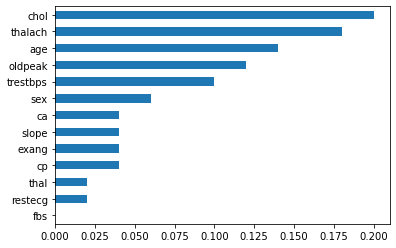

In [23]:
df_feature.sort_values().plot(kind='barh')

<AxesSubplot:>

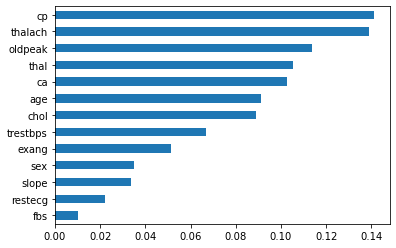

In [24]:
df_feature = pd.Series(rf_clf.feature_importances_,index=x.columns)
df_feature.sort_values().plot(kind='barh')

# Hyperparamter Tuning

In [28]:
adb_clf= AdaBoostClassifier()
hyper ={'n_estimators':np.arange(10,50),
       'learning_rate':np.arange(0,2,0.001)}
rdscv_adb =RandomizedSearchCV(adb_clf,hyper,cv=5)
rdscv_adb.fit(x_train,y_train)
rdscv_adb.best_estimator_



AdaBoostClassifier(learning_rate=0.8180000000000001, n_estimators=10)

In [30]:
adb_clf_hyp=AdaBoostClassifier(learning_rate=0.8180000000000001, n_estimators=10,random_state=45)
adb_clf_hyp.fit(x_train,y_train)

AdaBoostClassifier(learning_rate=0.8180000000000001, n_estimators=10,
                   random_state=45)

In [32]:
#Training 
y_pred_train = adb_clf_hyp.predict(x_train)

cnf_metrics = confusion_matrix(y_train,y_pred_train)
print("confusion metrics\n",cnf_metrics)

accuracy = accuracy_score(y_train,y_pred_train)
print("accuracy",accuracy)
clf_report = classification_report(y_train,y_pred_train)
print("clf_report\n",clf_report)

confusion metrics
 [[ 98  21]
 [ 13 129]]
accuracy 0.8697318007662835
clf_report
               precision    recall  f1-score   support

           0       0.88      0.82      0.85       119
           1       0.86      0.91      0.88       142

    accuracy                           0.87       261
   macro avg       0.87      0.87      0.87       261
weighted avg       0.87      0.87      0.87       261



In [31]:
#Testing
y_pred_test = adb_clf_hyp.predict(x_test)

cnf_metrics = confusion_matrix(y_test,y_pred_test)
print("confusion metrics\n",cnf_metrics)

accuracy = accuracy_score(y_test,y_pred_test)
print("accuracy",accuracy)
clf_report = classification_report(y_test,y_pred_test)
print("clf_report\n",clf_report)

confusion metrics
 [[17  2]
 [ 2 21]]
accuracy 0.9047619047619048
clf_report
               precision    recall  f1-score   support

           0       0.89      0.89      0.89        19
           1       0.91      0.91      0.91        23

    accuracy                           0.90        42
   macro avg       0.90      0.90      0.90        42
weighted avg       0.90      0.90      0.90        42



<AxesSubplot:>

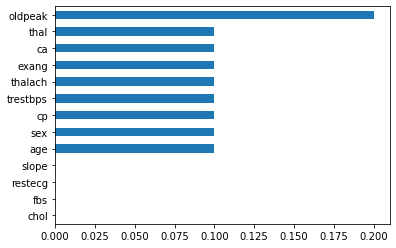

In [34]:
s= pd.Series(adb_clf_hyp.feature_importances_,index=x.columns)
s.sort_values().plot(kind='barh')

In [ ]:
Model                       Training accuracy      Testing accuracy     Precision     Recall 
DT_Hyperparamter
DT_Pruning
RF_Hyper
RF_Without Hyper
Adaboost_Hyperpar
Adaboost_Without
KNNi
Logistic

In [32]:
arr=np.array([1,'two','3'],[4,5,'six'])

TypeError: Field elements must be 2- or 3-tuples, got '4'